In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected = True)

In [3]:
df = pd.read_csv('TravelInsurancePrediction.csv')

In [4]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [6]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [8]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
df['Employment Type']=df['Employment Type'].map({'Private Sector/Self Employed':1,'Government Sector':0})
df['GraduateOrNot']=df['GraduateOrNot'].map({'Yes':1,'No':0})
df['FrequentFlyer']=df['FrequentFlyer'].map({'No':0,'Yes':1})
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'No':0,'Yes':1})

In [10]:
for i in df.columns:
    print(i,df[i].unique())

Age [31 34 28 25 33 26 32 29 35 30 27]
Employment Type [0 1]
GraduateOrNot [1 0]
AnnualIncome [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]
FamilyMembers [6 7 4 3 8 9 5 2]
ChronicDiseases [1 0]
FrequentFlyer [0 1]
EverTravelledAbroad [0 1]
TravelInsurance [0 1]


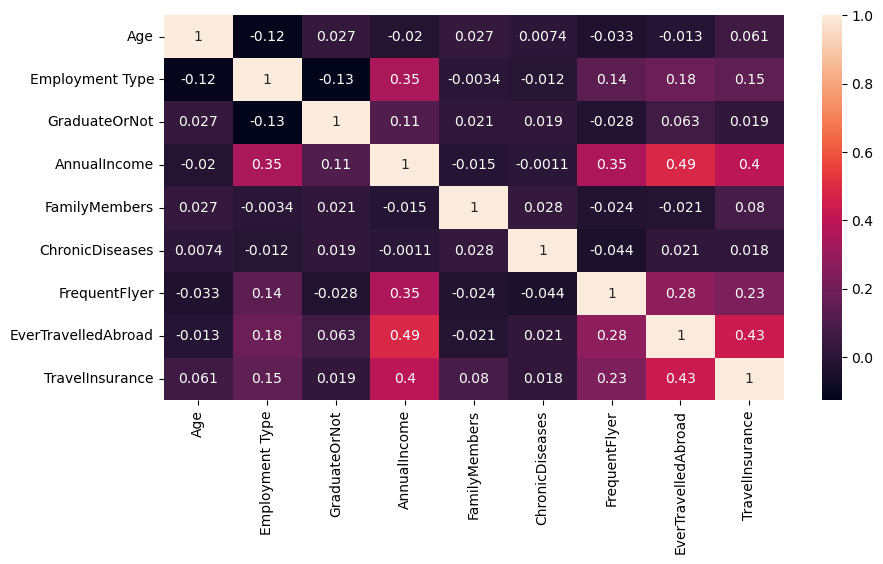

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Univariate

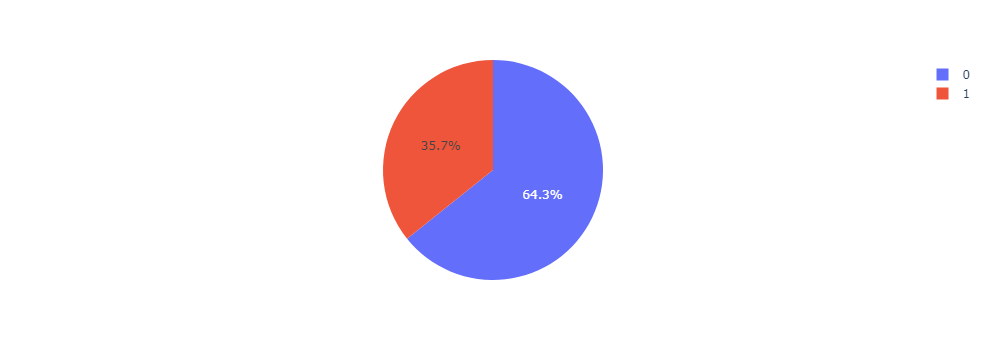

In [12]:
px.pie(df, 'TravelInsurance',labels={'TravelInsurance':'Bought'})

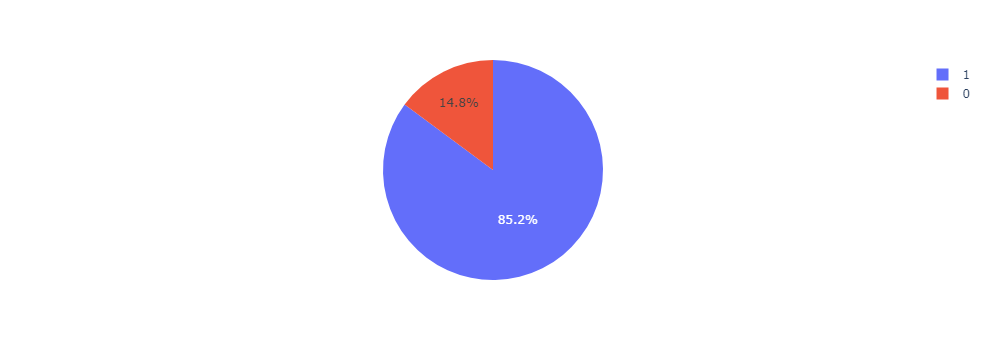

In [13]:
px.pie(df,'GraduateOrNot',labels={'GraduateOrNot':'Graduated'})

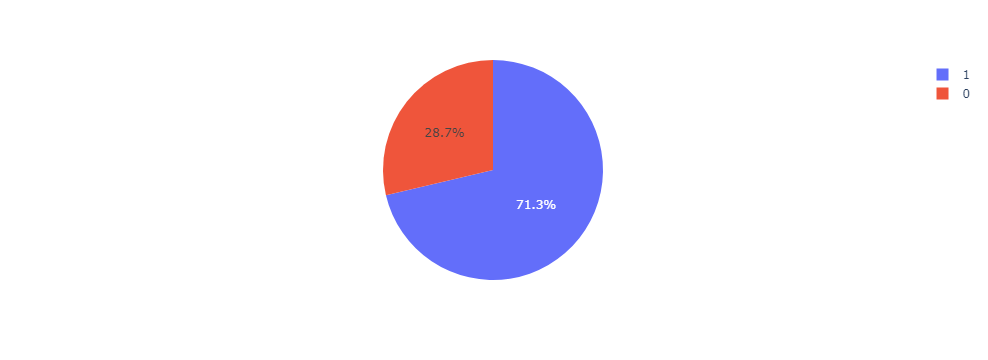

In [14]:
px.pie(df,'Employment Type')

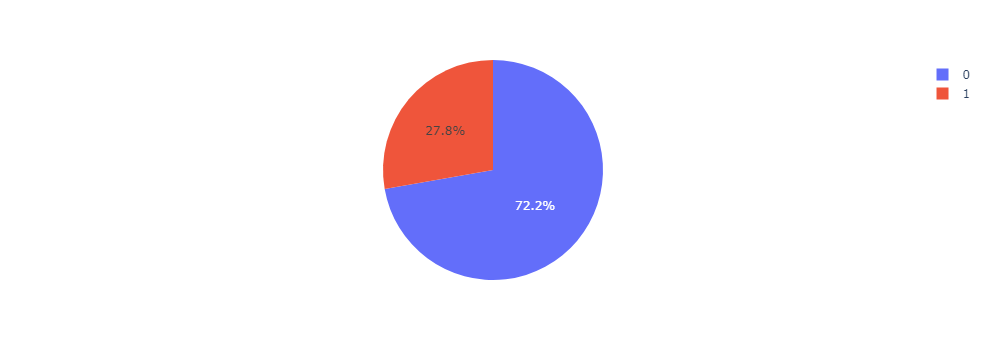

In [24]:
px.pie(df,'ChronicDiseases')

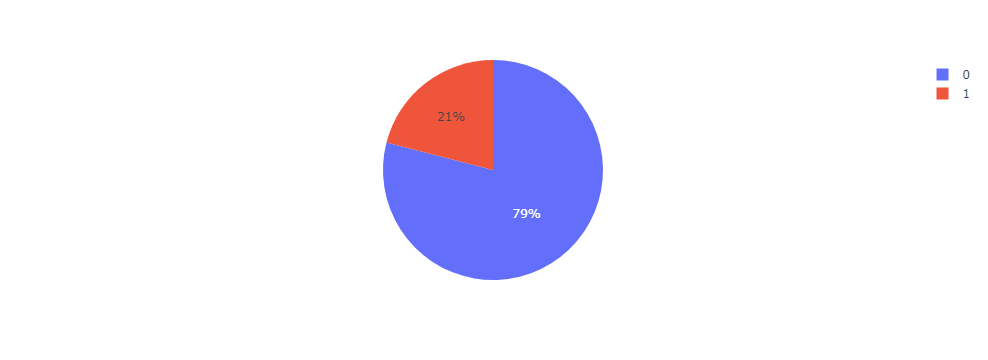

In [25]:
px.pie(df,'FrequentFlyer')

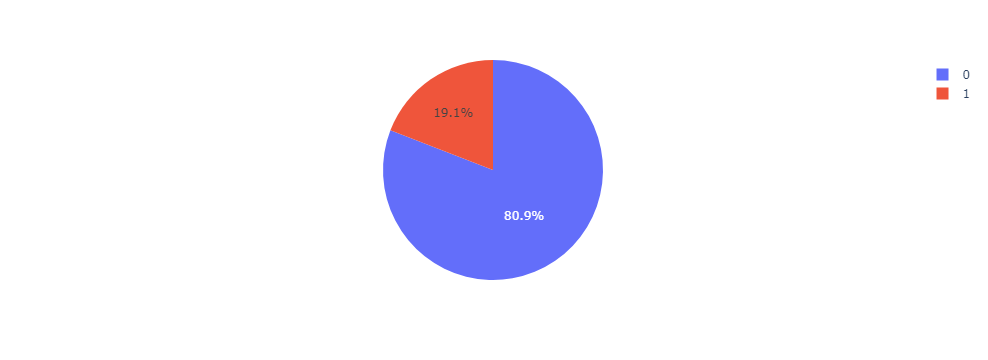

In [27]:
px.pie(df,'EverTravelledAbroad')

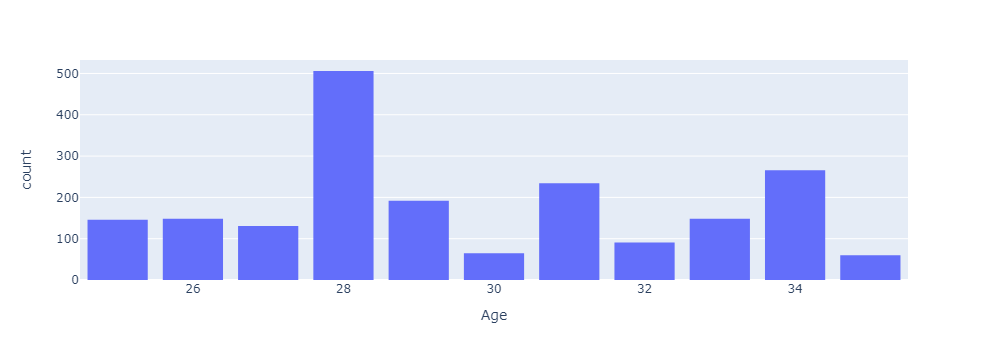

In [15]:
fig=px.histogram(df,'Age')
fig.update_layout(bargap=0.2)
fig.show()

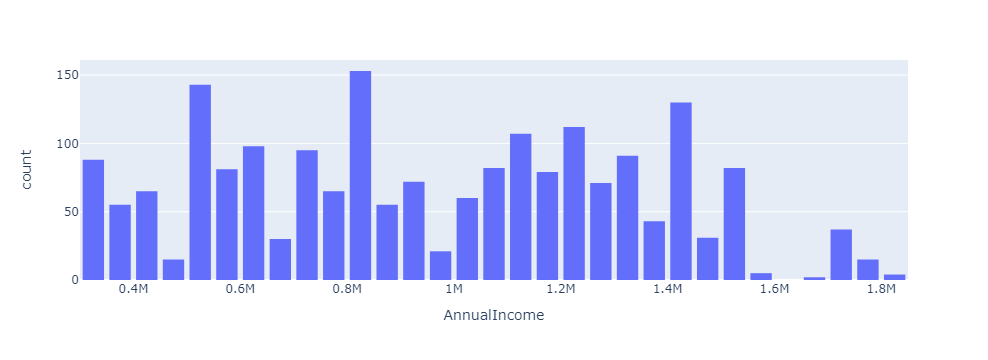

In [16]:
fig=px.histogram(df,'AnnualIncome')
fig.update_layout(bargap=0.2)
fig.show()

### Multivariate and Bivariate

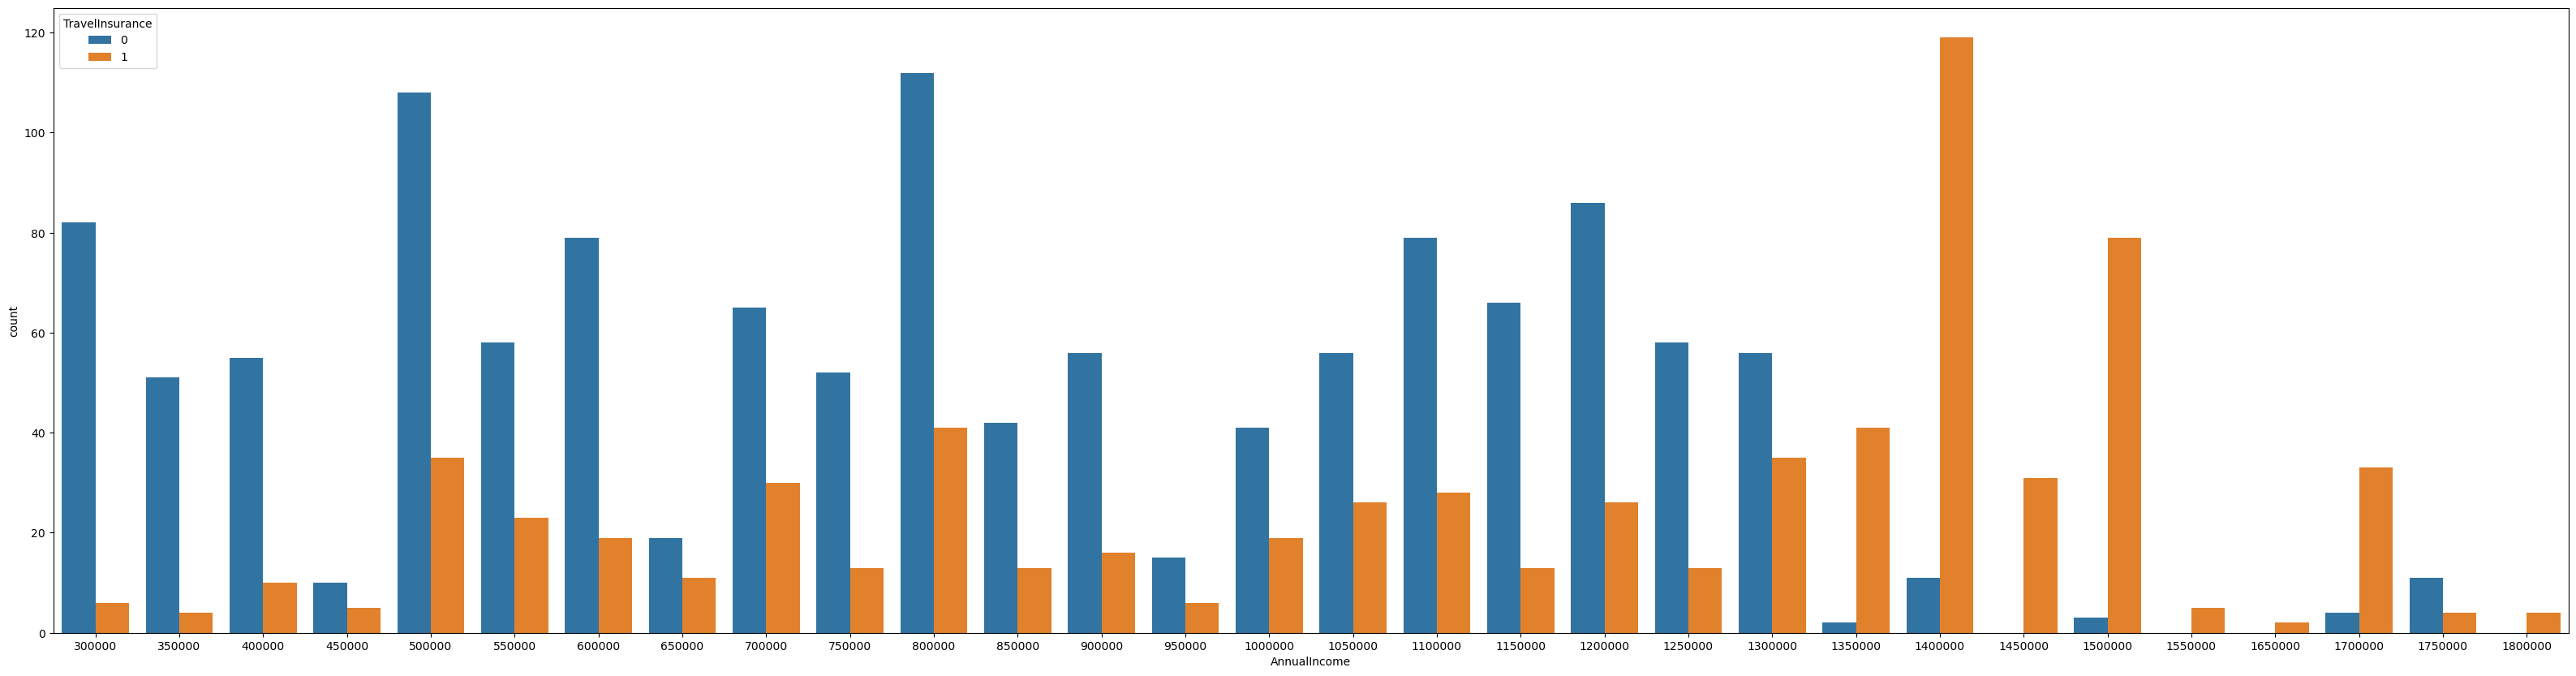

In [17]:
plt.figure(figsize=(40,10))
sns.countplot(x='AnnualIncome',hue='TravelInsurance',data=df)
plt.show()

- Perubahan paling signifikan terlihat setelah angka pendapatan 1.3M, dimana customer yang tidak membeli angkanya langsung turun dengan drastis. Perubahan yang drastis akan pendapatan ini dapat kita jadikan acuan untuk melakukan test terhadap korelasi kolom ini terhadap feature yang lainnya, seperti apakah produk travel insurance kita tidak memberikan akses untuk customer yang memiliki low-income? atau siapa sajakah customer yang memiliki high-income ini?

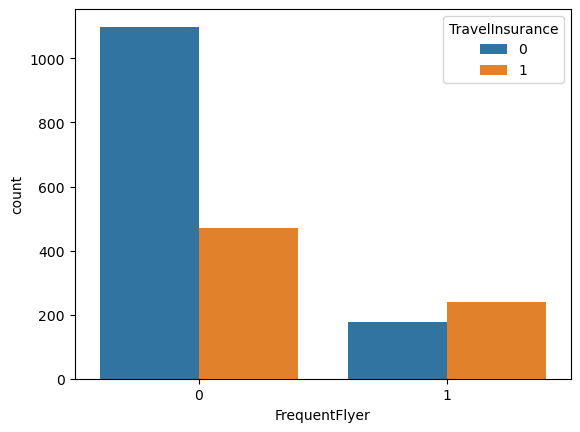

In [18]:
sns.countplot(x='FrequentFlyer',hue='TravelInsurance',data=df)
plt.show()

- insight

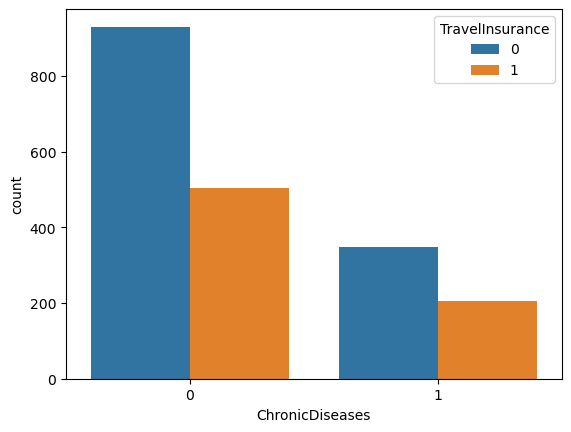

In [19]:
sns.countplot(x='ChronicDiseases',hue='TravelInsurance',data=df)
plt.show()

- Data yang ada tidak memberikan terlalu banyak informasi tentang pengaruh dari penyakit kronis terhadap pembelian Travel Insurance.

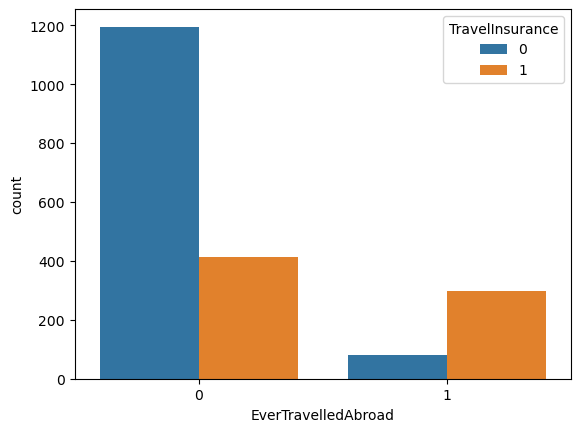

In [20]:
sns.countplot(x='EverTravelledAbroad',hue='TravelInsurance',data=df)
plt.show()

- Untuk para customer yang tidak pernah bepergian ke luar negeri dapat kita asumsikan bahwa customer tersebut tetap melakukan perjalanan namun perjalanan tersebut tidak keluar negeri. Hal ini dapat kita kaitkan dengan pernyataan bahwa customer yang tidak pernah pergi keluar negeri lebih cenderung tidak mengetahui manfaat dari travel insurance tersebut.

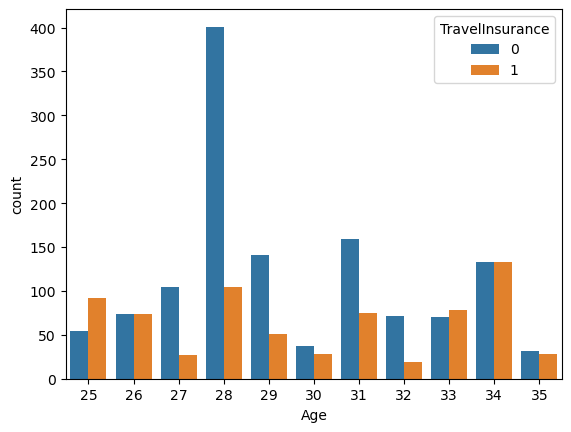

In [21]:
sns.countplot(x='Age',hue='TravelInsurance',data=df)
plt.show()

- insight

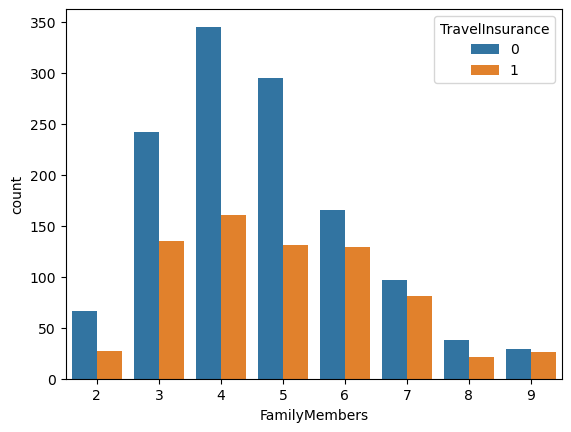

In [22]:
sns.countplot(x='FamilyMembers',hue='TravelInsurance',data=df)
plt.show()

- insight

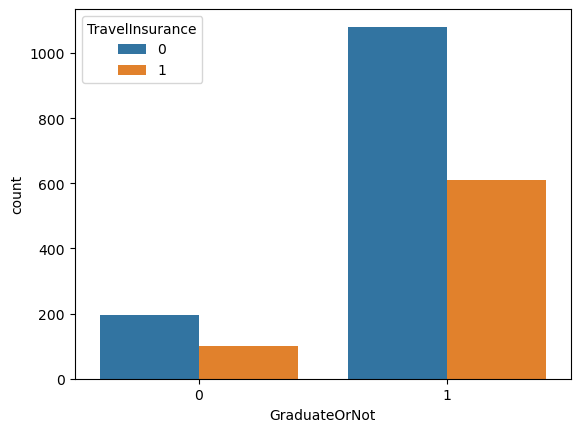

In [23]:
sns.countplot(x='GraduateOrNot',hue='TravelInsurance',data=df)
plt.show()

- insight